# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("df_modulo7.csv")
df.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,0,1,1,0,0,0,0,0,58.832877,3.106849,1,0,0,0,2.0,0
1,1,1,0,1,0,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0
2,2,0,1,1,0,0,1,0,0,46.224658,2.106849,1,1,1,1,2.0,0
3,3,1,1,0,0,0,2,0,0,29.230137,3.021918,1,0,0,0,2.0,0
4,4,1,0,1,0,0,0,0,0,27.482192,4.024658,1,0,1,0,2.0,0


In [4]:
y = df.mau
X = df.drop("mau",axis=1)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [5]:
df = DecisionTreeClassifier(random_state=100)
df

DecisionTreeClassifier(random_state=100)

In [6]:

df = df.fit(X, y)
df

DecisionTreeClassifier(random_state=100)

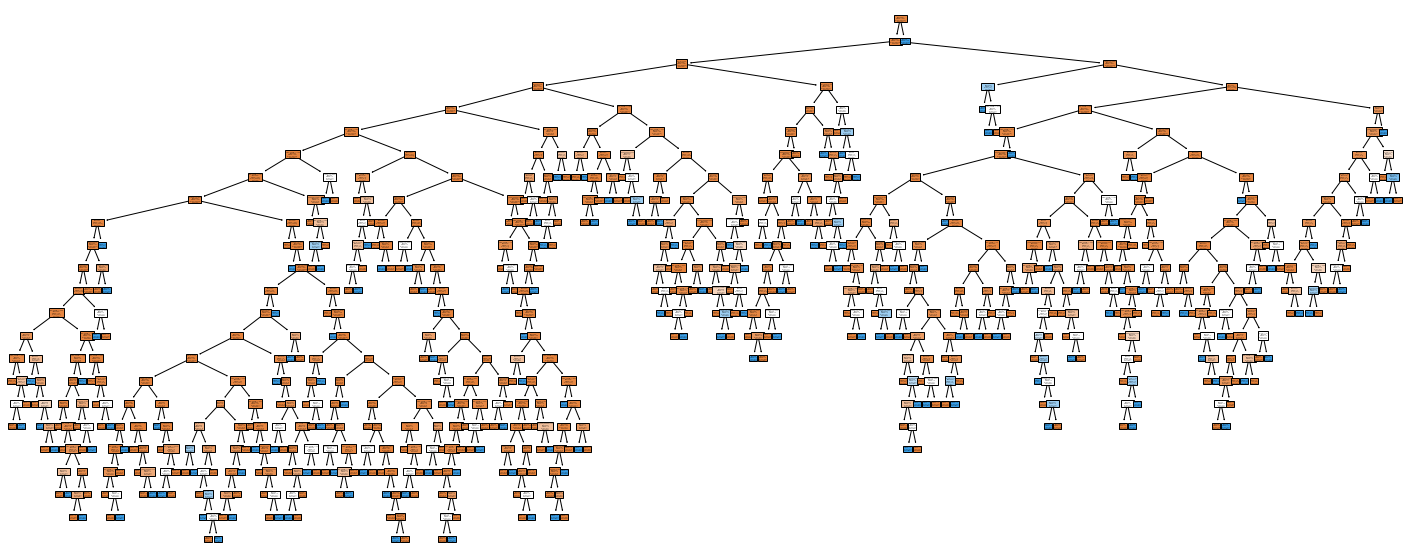

In [7]:
plt.figure(figsize=(25,10))
plot_tree(df,
         filled=True,
         class_names= ['bom', 'mau'],
         feature_names=X.columns);

C:\Users\soare\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


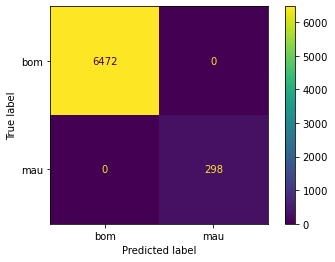

In [8]:
plot_confusion_matrix(df, X, y, display_labels=['bom', 'mau'])

In [9]:
predict= df.predict(X)

In [10]:
accuracy_score(y, predict)

1.0

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) 

In [12]:
df = DecisionTreeClassifier(random_state=100)
df = df.fit(X_train, y_train)

In [13]:
predict = df.predict(X_train)


In [14]:
accuracy_score(y_train, predict)

1.0

C:\Users\soare\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


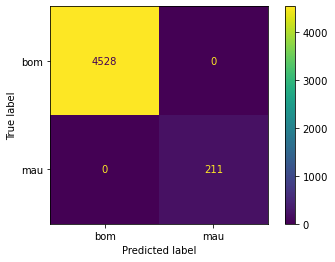

In [15]:
plot_confusion_matrix(df, X_train, y_train, display_labels=['bom', 'mau'])

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

C:\Users\soare\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


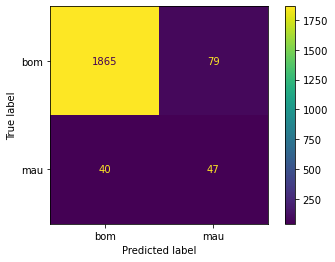

In [16]:
plot_confusion_matrix(df, X_test, y_test, display_labels=['bom', 'mau']);

In [17]:
predict = df.predict(X_test)

In [18]:
accuracy_score(y_test, predict)

0.9414081733136386

In [22]:
df = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
df = df.fit(X_train,y_train)
predict = df.predict(X_test)
accuracy_score(y_test, predict)

0.9773510585918267

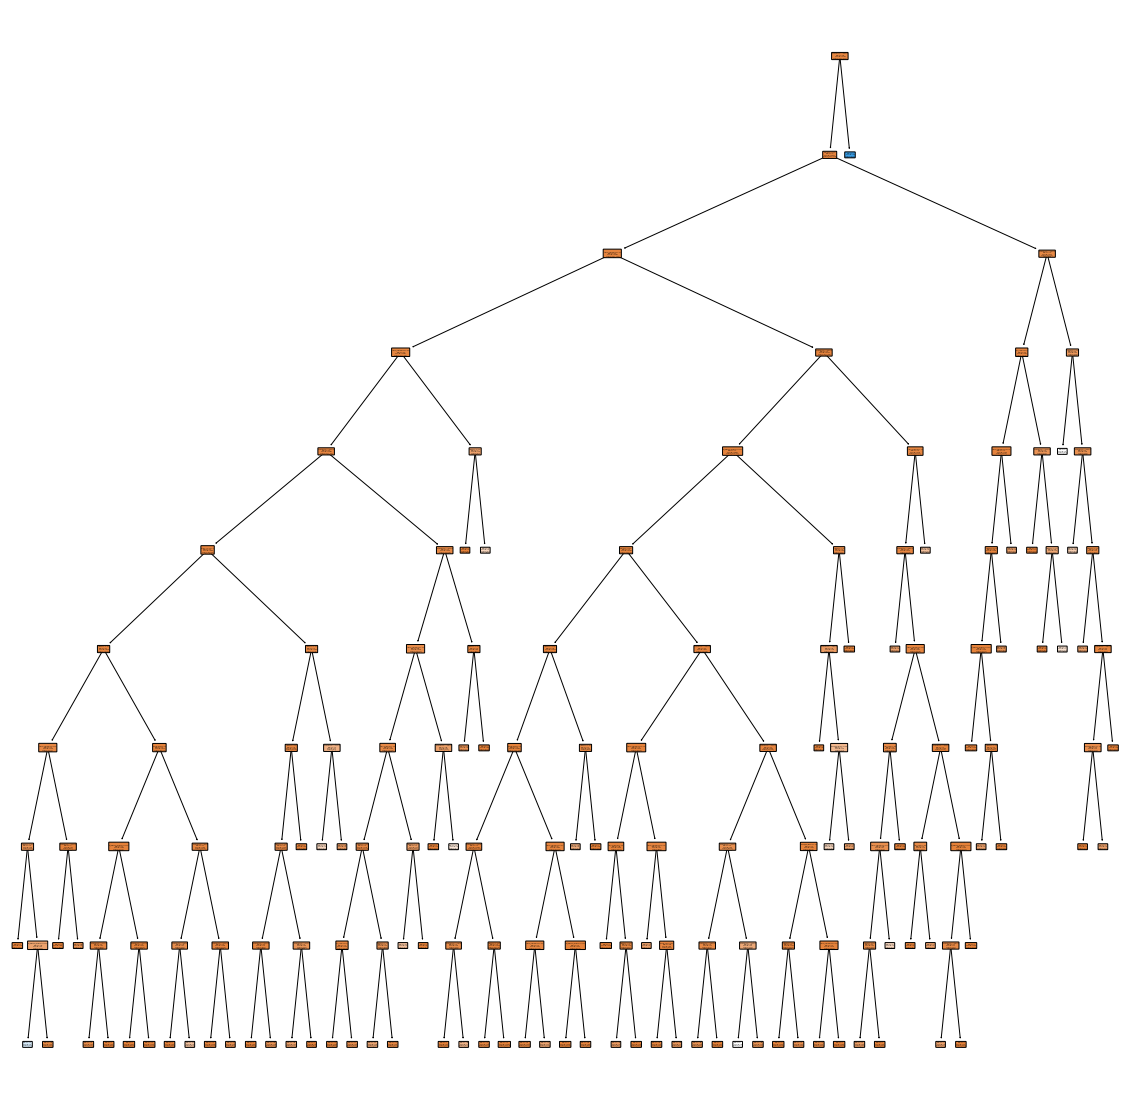

In [23]:
plt.figure(figsize=[20,20])
plot_tree(df,
         filled=True,
         rounded=True,
         class_names=['bom', 'mau'],
         feature_names=X_train.columns);